In [2]:
using Plots, Printf, DelimitedFiles, BenchmarkTools
using Revise
using MDToolbox
ENV["COLUMNS"] = 130

┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1260


130

In [19]:
q_array = readdlm("data/quaternion/QUATERNION_LIST_576_Orient");

In [21]:
model_array = readpdb("data/t1r/cluster.pdb");
for iatom = 1:model_array.natom
    model_array.atomname[iatom] = model_array.resname[iatom]
end
model_array = model_array[2:2:50, :]

25x1044 TrjArray{Float64,Int64}
| X                          | X                          |  …   X                          | X                          |
| 1THR                       | 2SER                       |  …   1043PRO                    | 1044SER                    |
| 1THR                       | 2SER                       |  …   1043PRO                    | 1044SER                    |
|   124.28    93.08   -12.36 |   123.45    91.84    -9.13 |  …     204.75   148.42    18.59 |   207.50   151.03    18.92 |
|   126.61    98.55   -14.33 |   125.41    95.98   -11.93 |        179.36   149.81   -35.57 |   181.71   146.56   -36.55 |
|   128.01    97.76   -15.45 |   127.61    95.04   -12.88 |        208.07   132.82   -14.23 |   207.56   130.09   -11.50 |
|   125.59    91.47   -14.13 |   127.36    95.02   -12.88 |        201.26   157.14   -15.64 |   203.43   157.12   -12.80 |
|   125.54    96.57   -11.52 |   124.68    94.07    -8.90 |        209.63   139.51     4.18 |   212.71   14

In [22]:
MDToolbox.decenter!(model_array)

In [23]:
#model_rotated = MDToolbox.rotate(model_array[1, :], q_array[100, :])
#observed = afmize(model_rotated, AfmizeConfig(10.0 * (pi / 180), 30.0, MDToolbox.Point2D(-250, -200), MDToolbox.Point2D(250, 200), MDToolbox.Point2D(6.25, 6.25), MDToolbox.defaultParameters()))
#observed = translateafm(observed, (2, 3))
#heatmap(observed)

In [24]:
param_array = [];
for r in [30.0]
  param_array = [param_array; AfmizeConfig(10.0 * (pi / 180), r, MDToolbox.Point2D(-250, -200), MDToolbox.Point2D(250, 200), MDToolbox.Point2D(6.25, 6.25), MDToolbox.defaultParameters())]
end

In [25]:
asd = readasd("data/t1r/201711020044.asd");

In [32]:
afm_frames = []
for i = 1:length(asd.frames)
    push!(afm_frames, asd.frames[i].data)
end
afm_frames = afm_frames[1:100];

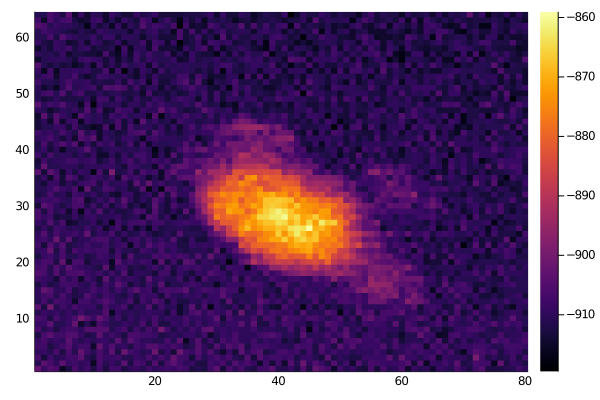

In [33]:
heatmap(afm_frames[100])

In [ ]:
#r = getafmposterior(asd.frames[11].data, model_array, q_array, param_array)
r = getafmposteriors_alpha(afm_frames, model_array, q_array, param_array)

func is fft_convolution
model_id = 1
